# Customer Churn Classification Project 

**Overview:**
This project aims to analyze customer churn in a telecommunication company using classification models. We will explore and analyze the provided datasets to gain insights into factors influencing customer retention. The goal is to build machine learning models capable of predicting customer churn and offer valuable insights to the company for strategic decision-making.

**1.0 Business Understanding:**

   **1.1 Objective:**
   The main objective is to identify and understand factors influencing customer churn in the telecommunication industry. We aim to build effective classification models for predicting customer churn.  

## 1.1 Explanation of features

#### The following describes the columns present in the data.
1.	Gender -- Whether the customer is a male or a female
2.	SeniorCitizen -- Whether a customer is a senior citizen or not
3.	Partner -- Whether the customer has a partner or not (Yes, No)
4.	Dependents -- Whether the customer has dependents or not (Yes, No)
5.	Tenure -- Number of months the customer has stayed with the company
6.	Phone Service -- Whether the customer has a phone service or not (Yes, No)
7.	MultipleLines -- Whether the customer has multiple lines or not
8.	InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)
9.	OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)
10.	OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)
11.	DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)
12.	TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)
13.	StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)
14.	StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)
15.	Contract -- The contract term of the customer (Month-to-Month, One year, Two year)
16.	PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)
17.	Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))
18.	MonthlyCharges -- The amount charged to the customer monthly
19.	TotalCharges -- The total amount charged to the customer
20.	Churn -- Whether the customer churned or not (Yes or No)

**1.2 Hypothesis (Null and Alternate):**
   - Null Hypothesis (H0): There is no significant relationship between the Total Charges and customer churn.
   - Alternate Hypothesis (H1): There is a significant relationship between the Total Charges and customer churn.
   Ho : There seems to be no relationship between gender and whether the person is a senior citizen and the churn rate
   H1: There is a relationship between age and senior citizen and churn rate

   **1.3 Research/Analytical Questions:**
  
   - How do different services (PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, etc.) contribute to customer churn?
   - Is there any correlation between gender, age (SeniorCitizen), having a partner, having dependents, and customer churn?
   - How does the contract type (Contract) and billing preferences (PaperlessBilling, PaymentMethod) influence customer churn?
   - Is there a correlation between monthly charges (MonthlyCharges), total charges (TotalCharges), and customer churn?
   - What insights can be gained from the analysis to improve customer retention?
   - Is there a relationship between gender and the churn rate
   - How does internet service affect churn rate?
   - Are senior citizens more likely to churn


**2.0 Data Understanding:**
 
   **2.1 Importation:**
   Import necessary libraries and modules for data analysis and machine learning.

In [1]:
# Data manipulation packages
import pandas as pd
import numpy as np

#Data Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning Packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import pearsonr

# Database connection package
import pyodbc

# Ignore warnings (optional)
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Loading environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Getting the values for the credentials set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"
conn = pyodbc.connect(connection_string)

**2.2 Loading of Dataset:**
   Load the data from the SQL Server database and OneDrive.

In [ ]:
query= "select * from dbo.LP2_Telco_churn_first_3000"

In [2]:
first_data = pd.read_csv('churn_data.csv')
first_data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.50,False


In [3]:
first_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [4]:
# Loading the second dataset
url = 'https://github.com/Azubi-Africa/Career_Accelerator_LP2-Classifcation/raw/main/LP2_Telco-churn-second-2000.csv'

second_data= pd.read_csv(url)

second_data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.5,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.0,1046.5,Yes


In [5]:
second_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


Standardization of the datasets

In [6]:
# Looping through the columns to change the boolean datatypes in the first data to objects
boolean_columns = ['SeniorCitizen','Partner','Dependents','Churn','PhoneService','MultipleLines','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
 
for col in boolean_columns:
    first_data[col] = first_data[col].map({True: 'Yes', False: 'No'})

In [7]:
# Changing the senior citizen column in the second dataset from yes and no to 1 and 0
first_data['SeniorCitizen'] = first_data['SeniorCitizen'].map({'Yes': 1, 'No': 0})
# removing the non-numeric characters from the total charges column
second_data['TotalCharges'] = pd.to_numeric(second_data['TotalCharges'], errors='coerce')
# changing the total charges column from an object to a float datatype
second_data['TotalCharges'] = second_data['TotalCharges'].astype(float)

In [8]:
# standardizing the data in the columns
first_data['MultipleLines']= first_data['MultipleLines'].replace({False:'No', True:'Yes', None:'No phone service'})
first_data['PhoneService']= first_data['PhoneService'].replace({False:'No', True:'Yes', None:'No phone service'})
first_data['DeviceProtection']= first_data['DeviceProtection'].replace({False:'No', True:'Yes', None:'No phone service'})
first_data['TechSupport']= first_data['TechSupport'].replace({False:'No', True:'Yes', None:'No phone service'})
first_data['PaperlessBilling']= first_data['PaperlessBilling'].replace({False:'No', True:'Yes', None:'No phone service'})
first_data['StreamingTV']= first_data['StreamingTV'].replace({False:'No', True:'Yes', None:'No phone service'})
first_data['StreamingMovies']= first_data['StreamingMovies'].replace({False:'No', True:'Yes', None:'No phone service'})
first_data['OnlineSecurity']= first_data['OnlineSecurity'].replace({False:'No', True:'Yes', None:'No phone service'})
first_data['OnlineBackup']= first_data['OnlineBackup'].replace({False:'No', True:'Yes', None:'No phone service'})


Joining the two datasets

In [9]:
# Merging two datasets
df = pd.concat([first_data,second_data])
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.50,No


**2.3 EDA:**
   - Explore data (info, duplicated, null values, describe)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [11]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               1
dtype: int64

In [12]:
# checked for duplicated values
df.duplicated().sum()

0

There was no duplicated values

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775,70.550003,90.050003,118.650002
TotalCharges,5043.0,2302.062861,2267.682399,18.799999,418.000,1406.000000,3857.575073,8670.100000


Variability and Spread:

SeniorCitizen:

Insight: The standard deviation is 0.37, indicating some variability in the distribution of senior citizen status.
Further Action: To consider investigating factors contributing to variability and their potential impact.

Tenure:

Insight: The standard deviation is 24.53, suggesting a considerable spread in tenure values.
Further Action: To explore factors influencing the wide range of tenure, such as customer retention strategies.

MonthlyCharges:

Insight: The standard deviation is 30.07, indicating notable variability in monthly charges.
Further Action: To investigate factors contributing to variations in monthly charges and their implications for customer behavior.

In [13]:
df.describe(include='object').T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
Partner,5043,2,No,2585
Dependents,5043,2,No,3482
PhoneService,5043,2,Yes,4554
MultipleLines,5043,3,No,2424
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,5043,4,No,2507
OnlineBackup,5043,4,No,2231
DeviceProtection,5043,4,No,2219


**2.3.1 Univariate Analysis:**
     Explore individual variables for insights.

Univariate Analysis

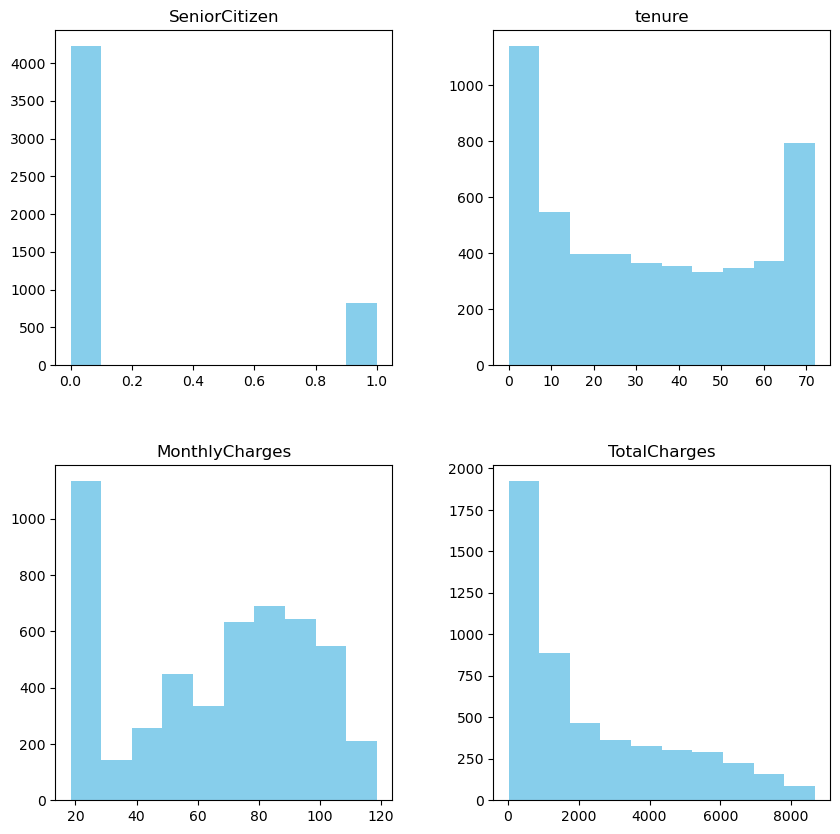

In [14]:
df.hist(figsize=(10,10),grid=False,color = 'skyblue')
plt.show()

Key Insights:
- The distribution of the monthly charges seems to follow the bell curve of a normal distribution
- Total charges column is positively skewed
- The numerical columns depicted by the histogram depict abnormal distribution, some like the monthly charges column are negatively skewed and will need nomalization in the data preparation phase

### Further Observation using KDE and box plot

<Axes: ylabel='Density'>

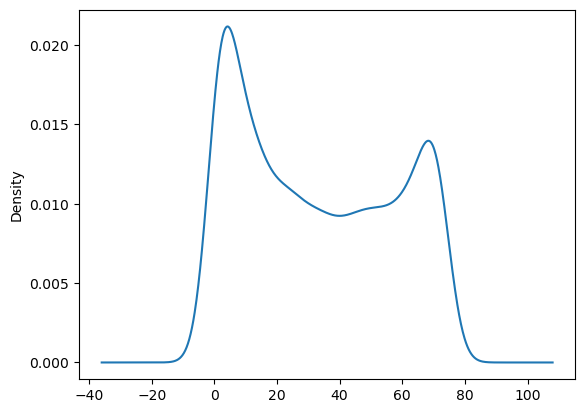

In [15]:
df['tenure'].plot(kind= 'kde')

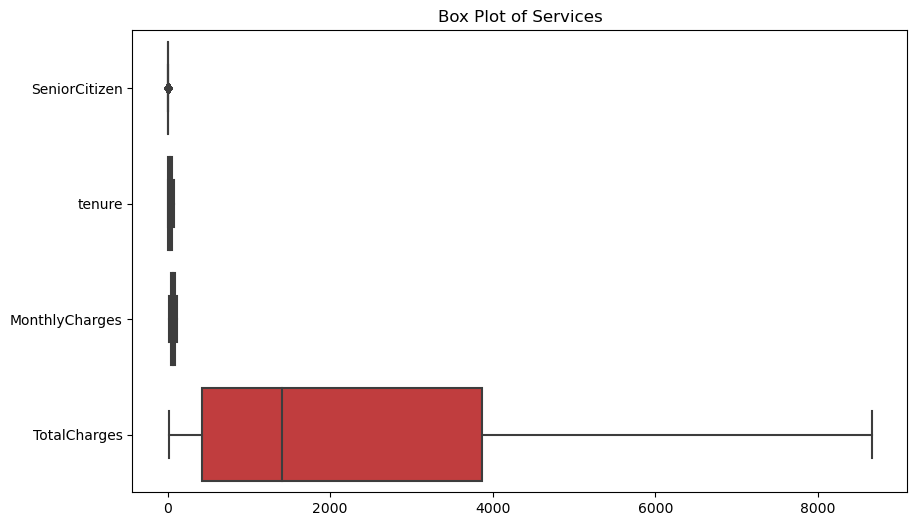

In [16]:
# Create a box plot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,orient='h')
plt.title('Box Plot of Services')
plt.show()

### Insights

- SeniorCitizen:
The variable takes values of 0 and 1, representing non-senior and senior citizens.To explore the impact of being a senior citizen on customer behavior or preferences.

- Tenure:
The minimum tenure is 0, and the maximum is 72. To investigate customers with very short or long tenures to understand factors contributing to their behavior.

- MonthlyCharges:
Monthly charges range from $18.40 to $118.65.To explore customer segments with high or low monthly charges and tailor strategies accordingly.

**2.3.2 Bivariate Analysis:**
     Investigate relationships between pairs of variables.

Bivariate Analysis

In [17]:
correlation = df.corr(numeric_only=True)

correlation

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.004597,0.221780,0.095212
tenure,0.004597,1.000000,0.240645,0.826264
MonthlyCharges,0.221780,0.240645,1.000000,0.647007
TotalCharges,0.095212,0.826264,0.647007,1.000000


<Axes: >

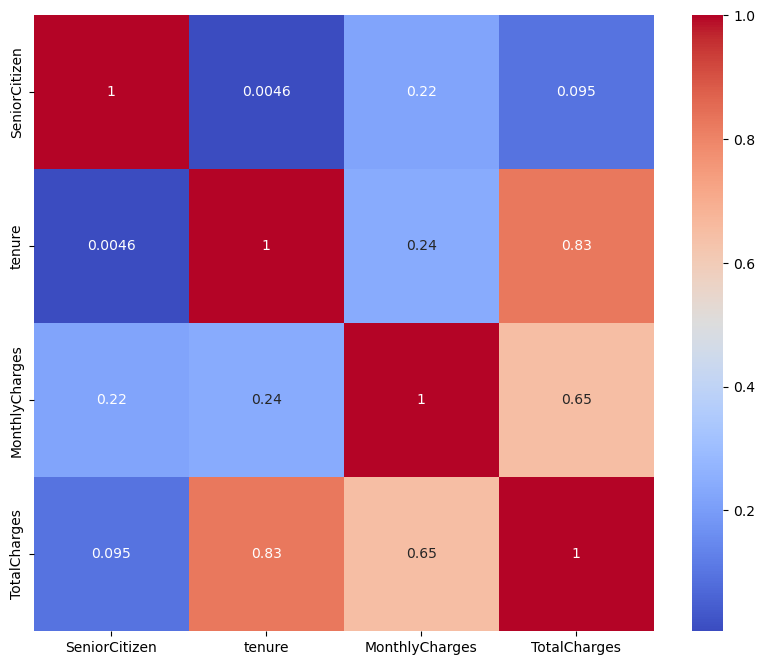

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(data = correlation,annot = True,cmap = 'coolwarm')

##### Key insights

- The tenure column is not crrelated with seniorcitezen table
- Tenure and Seniorcitezen is fairly correlated

**2.3.3 Multivariate Analysis:**
     Examine interactions between three or more variables.

In [ ]:
data = df[['gender','SeniorCitizen','MonthlyCharges']]

sns.pairplot(data,hue='gender')

**2.4 Answering Analytical Questions:**
     Visualizations

Q1.How do different services (PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, etc.) contribute to customer churn?

In [19]:
churn_counts = df.groupby(['InternetService', 'Churn']).size().unstack()
churn_counts

Churn,No,Yes
InternetService,,
DSL,1406,309
Fiber optic,1296,951
No,1004,76


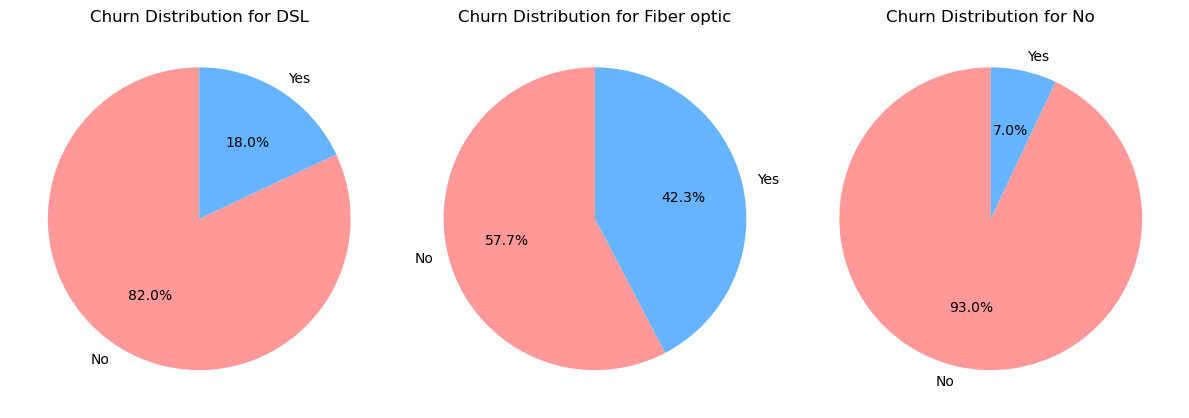

In [20]:
# Plot a pie chart for each internet service category
plt.figure(figsize=(12, 5))

for i, service_type in enumerate(churn_counts.index):
    plt.subplot(1, 3, i + 1)
    plt.pie(churn_counts.loc[service_type], labels=churn_counts.columns, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
    plt.title(f'Churn Distribution for {service_type}')

plt.tight_layout()
plt.show()

Key Insights and Recommendations
- 42% of the customers who churned had subscribed to fiber optic:
We recommend that the company to check the fiber optic connection and make sure that customer satisfaction is met

Q2.Is there any correlation between gender, age (SeniorCitizen), having a partner, having dependents, and customer churn?

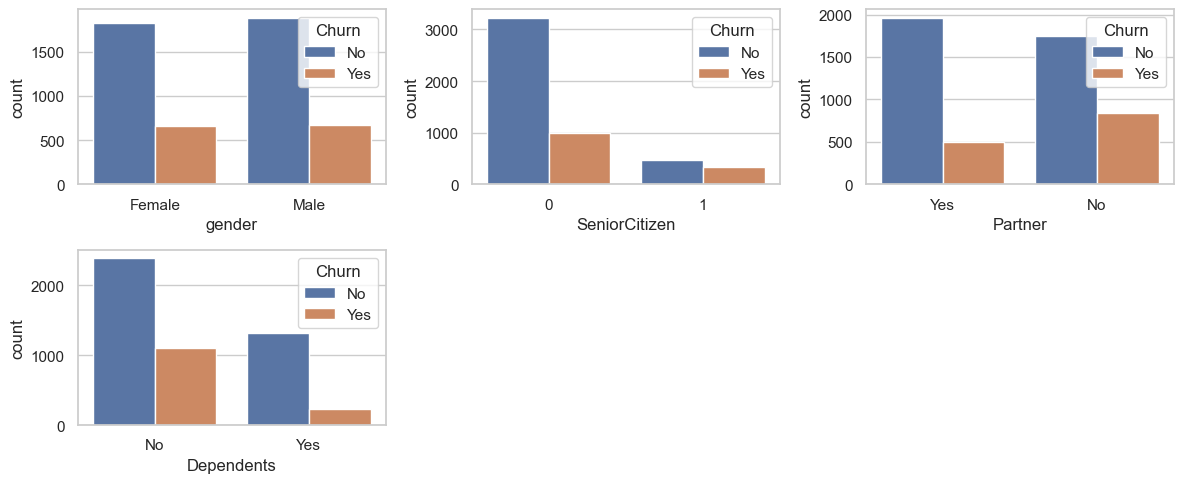

In [21]:
sns.set(style="whitegrid")

# Plotting gender distribution
plt.figure(figsize=(12, 5))
plt.subplot(2, 3, 1)
sns.countplot(x='gender', hue='Churn', data=df)

# Plotting SeniorCitizen distribution
plt.subplot(2, 3, 2)
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)

# Plotting Partner distribution
plt.subplot(2, 3, 3)
sns.countplot(x='Partner', hue='Churn', data=df)

# Plotting Dependents distribution
plt.subplot(2, 3, 4)
sns.countplot(x='Dependents', hue='Churn', data=df)


# Adjust layout
plt.tight_layout()
plt.show()

Key Insights and Recommendations:
- The male gender is less likely to churn as compared to females
- Seniorcitizens are less likely to churn
- The customers with partners are more likely to churn than the customers without partners
- Customers with dependants are more likely to churn than the ones without

Q3 How does the contract type (Contract) and billing preferences (PaperlessBilling, PaymentMethod) influence customer churn?

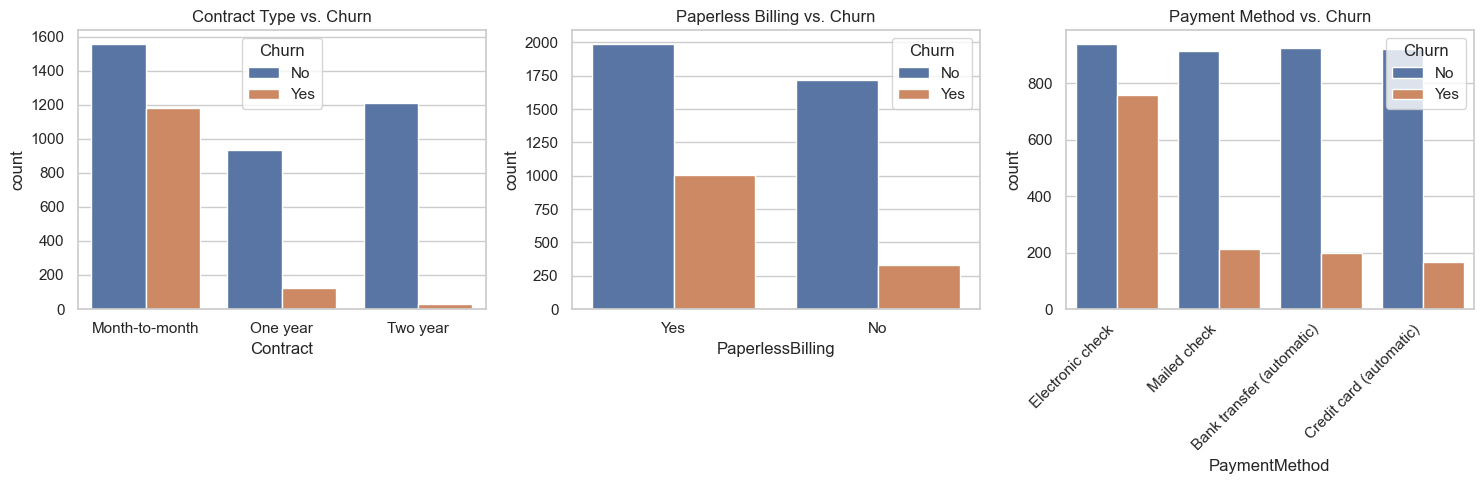

In [22]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Plotting contract type distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract Type vs. Churn')

# Plotting paperless billing distribution
plt.subplot(1, 3, 2)
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.title('Paperless Billing vs. Churn')

# Plotting payment method distribution
plt.subplot(1, 3, 3)
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Payment Method vs. Churn')

# Adjust layout
plt.tight_layout()
plt.show()


Key Insights and recommendations:
- Customers with month to month contract type are likely to churn as compared to customers with long term contracts of one year and above
- The company should consider giving incentives to long term contracts to attract more customers to subscribe

Q4. Is there a correlation between monthly charges (MonthlyCharges), total charges (TotalCharges), and customer churn?

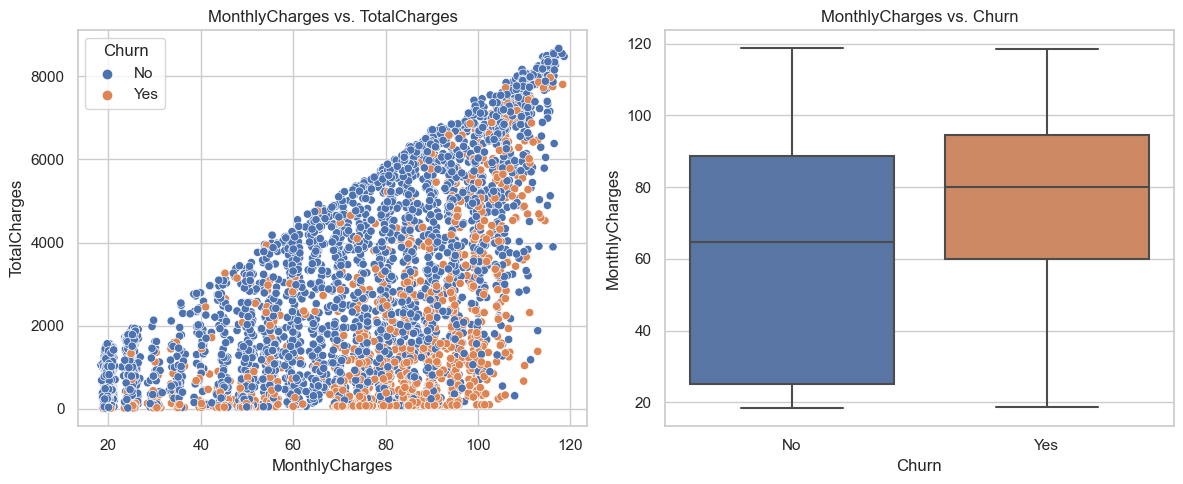

In [23]:
sns.set(style="whitegrid")

# Scatter plot for MonthlyCharges vs. TotalCharges
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df)
plt.title('MonthlyCharges vs. TotalCharges')

# Box plot for MonthlyCharges vs. Churn
plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges vs. Churn')

# Adjust layout
plt.tight_layout()
plt.show()

Key Insights:
- The monthly charges seem to have a correlation with the totalcharges , they seem to have a positive correlation with churn rate

Q5. Is there a relationship between gender and the churn rate?

In [24]:
df.groupby('gender')['Churn'].value_counts()

gender  Churn
Female  No       1823
        Yes       661
Male    No       1883
        Yes       675
Name: Churn, dtype: int64

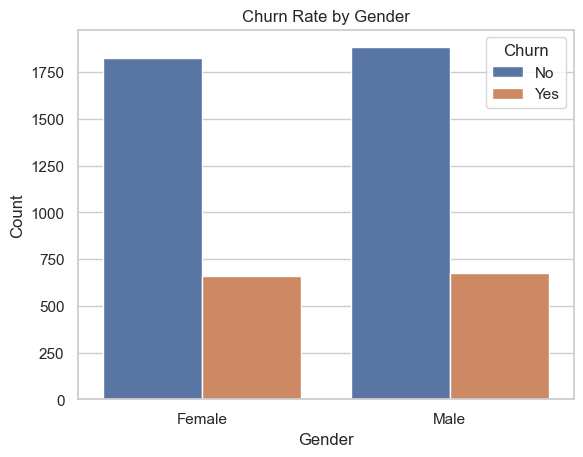

In [25]:
sns.countplot(x='gender', hue='Churn', data=df)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Rate by Gender')

# Show the plot
plt.show()

Q6. How does internet service affect churn rate?

Text(0, 0.5, 'Count')

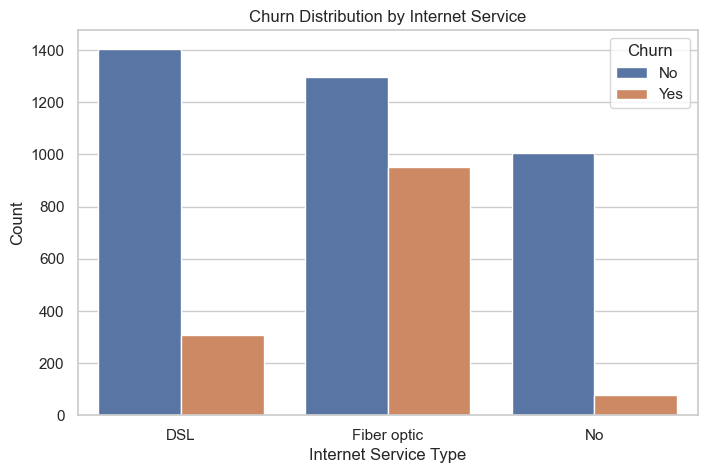

In [26]:
sns.set(style="whitegrid")

# Count plot for Churn based on InternetService
plt.figure(figsize=(8, 5))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn Distribution by Internet Service')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')

Q7.Are senior citizens more likely to churn

Text(0, 0.5, 'Count')

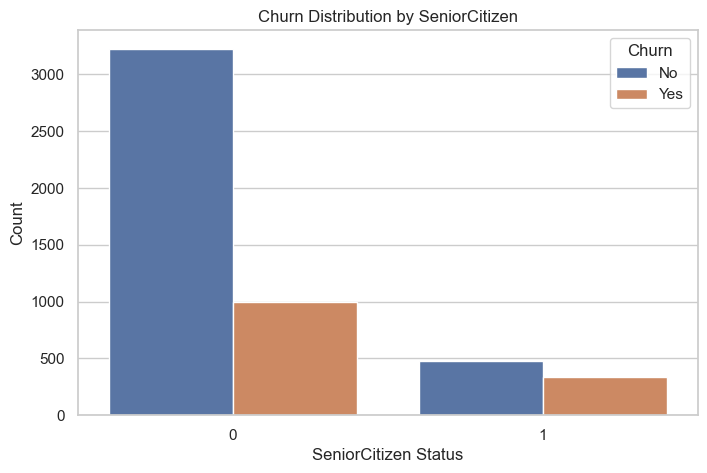

In [27]:
sns.set(style="whitegrid")

# Count plot for Churn based on SeniorCitizen status
plt.figure(figsize=(8, 5))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Churn Distribution by SeniorCitizen')
plt.xlabel('SeniorCitizen Status')
plt.ylabel('Count')

Q8. What is the churn rate in percentage?

In [28]:
# calculating the no of churned customers
churned_customers = df[df['Churn']=='Yes'].shape[0]

churned_customers

1336

In [29]:
# overall customers
total_customers = df.shape[0]

total_customers

5043

In [30]:
churn_rate = (churned_customers/total_customers) * 100

print('Overall churn rate is {:.2f}%'.format (churn_rate))

Overall churn rate is 26.49%


**2.5  Hypothesis Testing**
     

In [ ]:
# Replace 'TotalCharges' and 'Churn' with actual column names
total_charges = df['TotalCharges']
churn = df['Churn']

# Plot a scatter plot to visualize the relationship
sns.scatterplot(x=total_charges, y=churn)
plt.title('Scatter Plot of Total Charges vs. Churn')
plt.xlabel('Total Charges')
plt.ylabel('Churn')
plt.show()

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(total_charges, churn)

# Output the correlation coefficient and p-value
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Total Charges and Churn.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between Total Charges and Churn.")

**2.6 Insights and Recommendations:**
     

## 3.0 Data Preparation

### Data Cleaning- removing duplicates, handling missing values

In [31]:
# remove customerID column as it won't be relevant
df = df.drop('customerID',axis=1)

In [32]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               1
dtype: int64

Handling the missing values using simple imputer

In [33]:
# Using the simple imputer(mean) to impute for missing values in the Totalcharges column
imputer = SimpleImputer(strategy='mean')  

# Fit and transform the imputer on the 'TotalCharges' column
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])

In [34]:
# Using the simple imputer(mode) to impute for missing values in the churn column
imputer = SimpleImputer(strategy='most_frequent')  

# Fit and transform the imputer on the 'churn' column
df['Churn'] = imputer.fit_transform(df[['Churn']])

#### 3.1 Split data into input(X) and target(y) features

In [35]:
X = df.drop('Churn', axis=1)
y = df['Churn']

#### 3.2 Splitting data into training and evaluation

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42,stratify=y)

#### 3.3 Feature Engineering

In [41]:
numeric_cols = X.select_dtypes(include='number').columns

numeric_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [42]:
categorical_cols = X.select_dtypes(include='object').columns

categorical_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

#### 3.4 Pipeline

In [43]:
# creating a pipeline
numeric_pipeline = Pipeline(steps=[
    ('num_imputer',SimpleImputer(strategy='mean')),
    ('scaler ',RobustScaler()),
])

categorical_pipeline = Pipeline(steps=[
    ('cat_imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder()),
])

Preprocessor =ColumnTransformer([
    ('numerical_transformations',numeric_pipeline,numeric_cols),
    ('cat_transformations',categorical_pipeline,categorical_cols)

])

#### Label Encoding

In [44]:
LabelEncoder = LabelEncoder()
y_train_encoded = LabelEncoder.fit_transform(y_train)
y_test_encoded = LabelEncoder.transform(y_test)

#### ML Pipeline

In [45]:
decision_tree_classifier = DecisionTreeClassifier(random_state = 7)
decision_tree_pipeline = Pipeline([
    ('preprocessor',Preprocessor),
    ('classifier',decision_tree_classifier)
])

Pass Data through the Pipeline

In [46]:
decision_tree_pipeline.fit(X_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_transformations',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler ',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_transformations',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=7))])

Evaluating the trained model

In [47]:
# predicting the X_test values
pred = decision_tree_pipeline.predict(X_test)
pred

array([0, 0, 0, ..., 1, 0, 1])

In [48]:
# checking for the accuracy score
accuracy = accuracy_score(y_test_encoded, pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.72


In [49]:
# Printing the classification report
print(classification_report(y_test_encoded, pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       742
           1       0.48      0.54      0.51       267

    accuracy                           0.72      1009
   macro avg       0.65      0.67      0.66      1009
weighted avg       0.73      0.72      0.73      1009



Random forest model

In [50]:
# creating a random forest instance and passing it to the pipeline
random_forest = RandomForestClassifier()
ran_pipeline = Pipeline([
('preprocessor',Preprocessor),
    ('classifier',random_forest)
    ])

ran_pipeline.fit(X_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_transformations',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler ',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_transformations',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

Evaluating the trained model

In [51]:
# predicting the X_test values
predict = ran_pipeline.predict(X_test)
predict

array([0, 0, 0, ..., 1, 0, 0])

In [52]:
# checking the accuracy of the model
accuracy = accuracy_score(y_test_encoded, predict)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


In [53]:
# printing classification report
print(classification_report(y_test_encoded, predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       742
           1       0.62      0.50      0.55       267

    accuracy                           0.79      1009
   macro avg       0.73      0.70      0.71      1009
weighted avg       0.78      0.79      0.78      1009



Support Vector Machine Model

In [54]:
# creating a support vector machine instance and passing it the pipeline
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_pipeline = Pipeline([
('preprocessor',Preprocessor),
    ('classifier',svm)
    ])

svm_pipeline.fit(X_train,y_train_encoded)
    

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_transformations',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler ',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_transformations',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', SVC(random_state=42))])

Evaluating the trained model

In [55]:
# predicting the X_test values
s_predict = svm_pipeline.predict(X_test)
s_predict

array([0, 0, 0, ..., 1, 0, 0])

In [56]:
# checking the accuracy
accuracy = accuracy_score(y_test_encoded, s_predict)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [57]:
# printing classification report
print(classification_report(y_test_encoded, s_predict))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       742
           1       0.65      0.55      0.60       267

    accuracy                           0.80      1009
   macro avg       0.75      0.72      0.73      1009
weighted avg       0.80      0.80      0.80      1009



Naives Bayes Classifier Model

In [58]:
# creating a naives bayes instance and passing it the pipeline
naives_bayes = GaussianNB()
naives_pipeline = Pipeline(steps=[
    ('preprocessor',Preprocessor),
    ('model',naives_bayes)
])

naives_pipeline.fit(X_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_transformations',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler ',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_transformations',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', GaussianNB())])

Evaluating the trained model

In [59]:
# predicting the X_test values
n_predict = naives_pipeline.predict(X_test)
n_predict

array([1, 1, 0, ..., 1, 1, 0])

In [60]:
# checking the accuracy
accuracy = accuracy_score(y_test_encoded, n_predict)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.64


In [61]:
# printing the classification report
print(classification_report(y_test_encoded, n_predict))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       742
           1       0.65      0.55      0.60       267

    accuracy                           0.80      1009
   macro avg       0.75      0.72      0.73      1009
weighted avg       0.80      0.80      0.80      1009



Gradient Boosting Classifier Model

In [62]:
# creating a gradient boost instance and passing it the pipeline
gradient_boost = GradientBoostingClassifier()
gran_pipeline = Pipeline([
('preprocessor',Preprocessor),
    ('classifier',gradient_boost)
    ])

gran_pipeline.fit(X_train,y_train_encoded)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_transformations',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler ',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_transformations',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', GradientBoostingClassifier())])

Evaluating the trained model

In [63]:
# predicting the values in the X_test
g_predict = gran_pipeline.predict(X_test)
g_predict

array([0, 0, 0, ..., 1, 0, 0])

In [64]:
# checking the accuracy score of the model
accuracy = accuracy_score(y_test_encoded, g_predict)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [65]:
# printing the classification report
print(classification_report(y_test_encoded, g_predict))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       742
           1       0.64      0.56      0.60       267

    accuracy                           0.80      1009
   macro avg       0.75      0.72      0.73      1009
weighted avg       0.79      0.80      0.80      1009



Comparison of the models

According to the accuracy score we can see that the best model is GradientBoostingClassifier or Support Vector Machine Model with an accuracy score of 80%